In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
data = pd.read_csv('credit_risk_dataset.csv')

In [8]:
print(data.shape)
print(data.columns)
print(data.info())
print(data.describe())

(32581, 12)
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status         

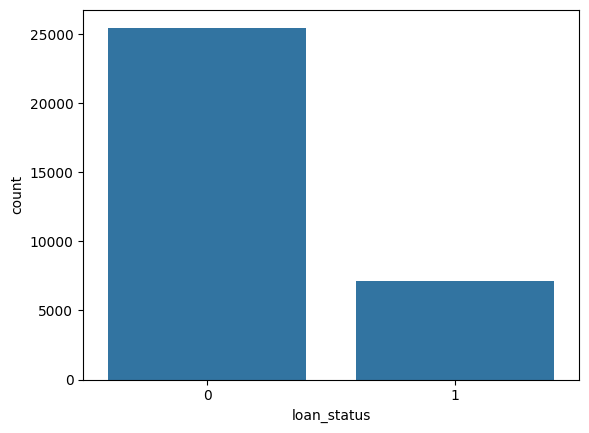

In [9]:
sns.countplot(x='loan_status', data=data)
plt.show()

In [10]:
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [11]:
data = data.fillna(data.median())

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('loan_status', axis=1))  # Semua fitur kecuali target
y = data['loan_status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.72      0.44      0.55      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.70      0.72      6517
weighted avg       0.83      0.84      0.82      6517

[[4820  252]
 [ 809  636]]
Accuracy: 0.8371950283872948


In [18]:
from sklearn.tree import DecisionTreeClassifier

X_raw = data.drop('loan_status', axis=1)
y_raw = data['loan_status']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_raw, y_train_raw)

y_pred_tree = tree_model.predict(X_test_raw)

print("=== Decision Tree Classification Report ===")
print(classification_report(y_test_raw, y_pred_tree))
print(confusion_matrix(y_test_raw, y_pred_tree))
print('Accuracy:', accuracy_score(y_test_raw, y_pred_tree))

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5072
           1       0.73      0.76      0.75      1445

    accuracy                           0.88      6517
   macro avg       0.83      0.84      0.84      6517
weighted avg       0.89      0.88      0.89      6517

[[4660  412]
 [ 340 1105]]
Accuracy: 0.8846094828909007
